In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nsltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import silhouette_score
#from surprise import Reader, Dataset, SVD, evaluate
import spacy
from sklearn.cluster import KMeans

ModuleNotFoundError: No module named 'nsltk'

In [3]:
df = pd. read_csv('movie_metadata.csv')
df.head()
# Normalize the spelling and add a space between each genre
df['genres'] = df['genres'].str.replace('|', ' ').str.lower()
df['plot_keywords'] = df['plot_keywords'].str.replace('|', ' ').str.lower()
df['director_name'] = df['director_name'].fillna('Unknown')
df['actor_1_name'] = df['actor_1_name'].fillna('Unknown')
df['actor_2_name'] = df['actor_2_name'].fillna('Unknown')
df['actor_3_name'] = df['actor_3_name'].fillna('Unknown')
df['language'] = df['language'].fillna('Unknown')
df['color'] = df['color'].fillna('Color')
df['movie_title'] = df['movie_title'].str.replace('\xa0','')
df = df.drop(['movie_imdb_link'], axis=1)
lab_enc = LabelEncoder()
df['color'] = lab_enc.fit_transform(df['color'])

C:\Users\24375\AppData\Local\Temp\ipykernel_35500\1827115701.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['genres'] = df['genres'].str.replace('|', ' ').str.lower()
C:\Users\24375\AppData\Local\Temp\ipykernel_35500\1827115701.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['plot_keywords'] = df['plot_keywords'].str.replace('|', ' ').str.lower()


Head Introduction:
We want to build a recommendation to improve our project. For doing this, we decided to implement two recommendation algorithms (content based and collaborative filtering) and then, we ensembled these two models to come up with our final recommendation system. For the first algorithm, we used them same dataset as we used before, while for the implementing the second algorithm, we use another two datasets.
Two New Datasets
The Full Dataset: 
Consists of 26,000,000 ratings and 750,000 tag applications applied to 45,000 movies by 270,000 users. Includes tag genome data with 12 million relevance scores across 1,100 tags.
The Small Dataset: 
Comprises of 100,000 ratings and 1,300 tag applications applied to 9,000 movies by 700 users.



Data cleaning:
Libraries we used in this project are sklearn, matplotlib, numpy, pandas, and scipy.
For getting a more neat and doable dataset, we first clean the dataset again. To be more specific, first, we normalize the spelling and add a space between each genre, then, replace in the all categorical variable columns' NaN by Unkown, clean the Color column and the title column by fullfill all of Nan entries with color, and finally, we dropped 'movie_imdb_link' column, which objectively speaking, is not influencial to our result.


Recomender Engine building
First, we think for many movie rating website, they will give users a general list of movies that have the highest ratings. Here, because our dataset has the IMDB ratings, we can simply sorting pandas dataframe to pick all movies by a decending order.Also, we can select different type of genres and sort them in a same as we did before such that we can give users a recommendation of best movies of each the type of movie. Here is the formula of IMDB Weighted Rating.


However, if we want to give users recommendation based on movies they are watching, such simple method may fail to give a good recommendation, becuase it only depends one varible to give the similarities of movies. 


Implement the first :
Second, we want to build our first model, Content Based Recommender,to give users some recommended movies based on what they are watching. This recommender totally depends on movies' information so that we do not need users' information.
To do that, we first select some categorical variables, which are usually treated as "contents", to have a dataframe. Here, we choose 'movie_title', 'genres', 'director_name', 'plot_keywords', 'content_rating','language','country'. We vectorize them for having further analysis by using TfidfVectorizer, a build-in TF-IDF Vectorizer of sklearn library.TF-IDF Vectorizer is widely used in nlp(natural language processing) problems. The calculation and idea of it is also very straightforward. TF stands for Term Frequency and IDF stands for Inverse Document Frequency. We generally compute a score for each word to signify its importance in the document and corpus. Term Frequency just measure the frequence that a specific word appears in our document, and IDF is the inverse of the document frequency which measures the informativeness of term t.Finally, by taking a multiplicative value of TF and IDF, we get the TF-IDF score. 
Here is the mathematic formula to calculate TF-IDF. 

  

Because we want to compare our model in different versions,we add some Soups,Bag of Words in different combination of several different
variables. 
For example, for Soup1, we combine 'movie_title', 'genres', and 'director_name'.
The actual idea behind the algorith we using is to measure the similarity between two movies by Cosine Similarity. Cosine Similarity is to calculate a numeric quantity that denotes the similarity between two movies. Mathematically, it is defined as follows:



Then,we need to use the the vectorized matrix we got before to find the some cosine similarity matrices. Finally, we get all of our similarity matrices and we can randomly choose one of them and see their performance. Here, we sort this matrix and get the scores of the 10 most similar movies.For example, when we want to give users a recommending list, our model will output contains 10 movies. 


However, considering that some recommendations only reflect that they are very similar to the movies user watching, which means it does not consider about the qulity of movies themslves.For figuring them out, we set up a benchmark to filter those movies that have very bad quality(based on their IMDB weighted ratings). 




Next, for improving our engine, we use a technics called 

In [4]:
temp = (df.sort_values(by = "imdb_score",ascending = False))['movie_title']
temp.head(25)

2765                         Towering Inferno            
1937                             The Shawshank Redemption
3466                                        The Godfather
4409                                 Kickboxer: Vengeance
2824                                  Dekalog            
3207                                  Dekalog            
66                                        The Dark Knight
2837                               The Godfather: Part II
3481                                    Fargo            
339         The Lord of the Rings: The Return of the King
4822                                         12 Angry Men
4498                       The Good, the Bad and the Ugly
3355                                         Pulp Fiction
1874                                     Schindler's List
683                                            Fight Club
836                                          Forrest Gump
270     The Lord of the Rings: The Fellowship of the Ring
2051       Sta

In [5]:
df_num = df.select_dtypes(include=np.number)
df_num.head()

scaler = MinMaxScaler()
scaler.fit(df_num)

# Apply
df_num_scaled = scaler.transform(df_num)
df_num_scaled = pd.DataFrame(df_num_scaled)
df_num_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,0.889163,0.339286,0.000000,0.037174,0.001563,1.000000,0.524453,0.007361,0.000000,0.603479,0.019402,0.93,0.006832,0.797468,0.040486,0.094556
1,1.0,0.370690,0.321429,0.024478,0.043478,0.062500,0.406840,0.278865,0.073622,0.000000,0.244515,0.024559,0.91,0.036496,0.696203,0.078947,0.000000
2,1.0,0.740148,0.279762,0.000000,0.007000,0.017188,0.263080,0.163256,0.017816,0.023256,0.196284,0.020056,0.99,0.002869,0.658228,0.078947,0.243553
3,1.0,1.000000,0.311508,0.956522,1.000000,0.042188,0.589253,0.677216,0.162561,0.000000,0.533702,0.020466,0.96,0.167883,0.873418,0.078947,0.469914
4,1.0,NaN,NaN,0.005696,NaN,0.000205,NaN,0.000002,0.000218,0.000000,NaN,NaN,NaN,0.000088,0.696203,NaN,0.000000


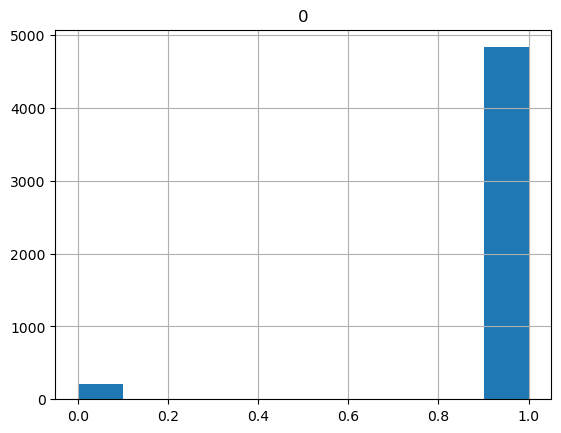

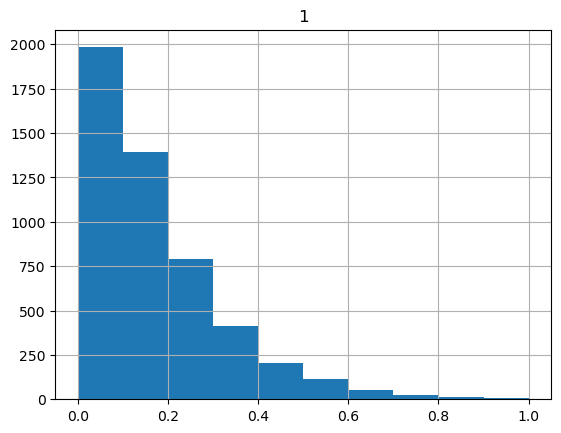

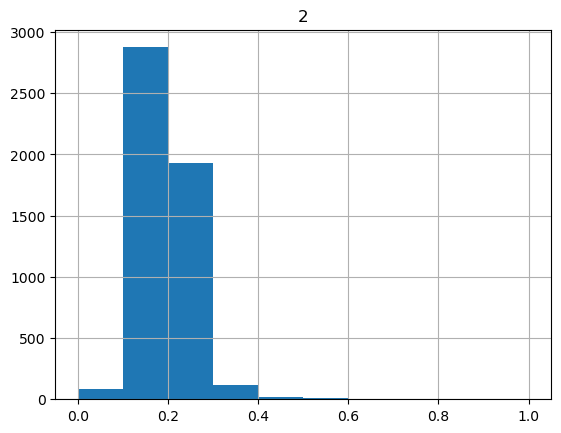

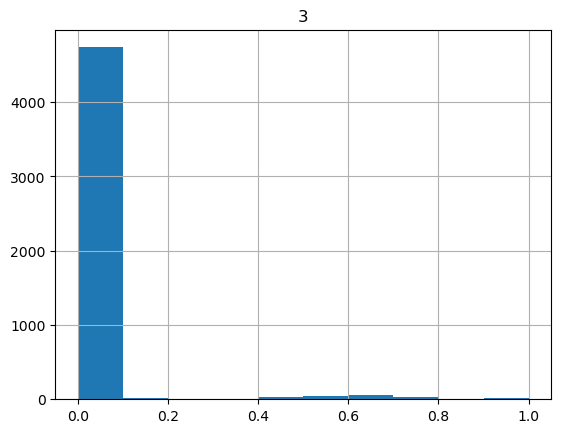

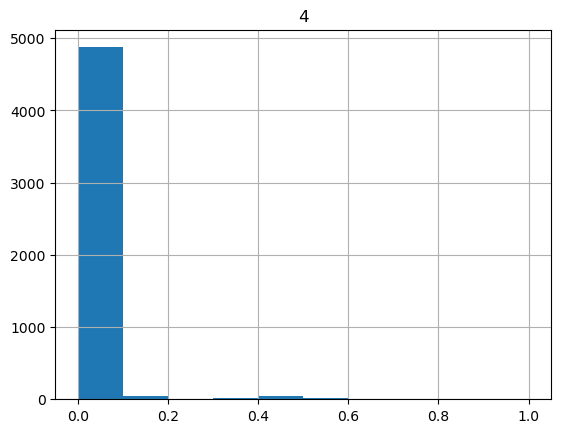

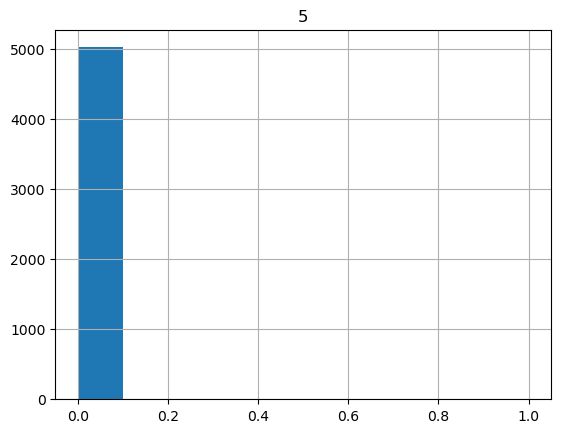

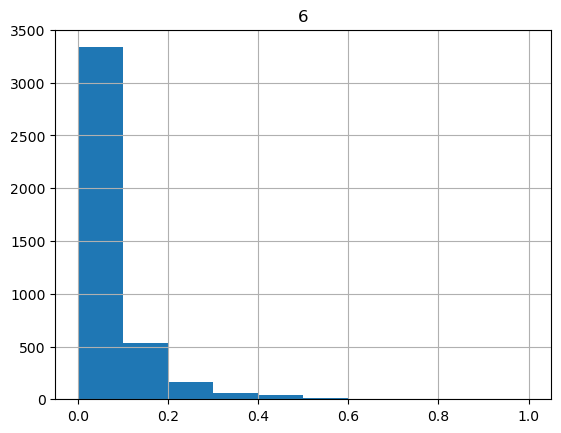

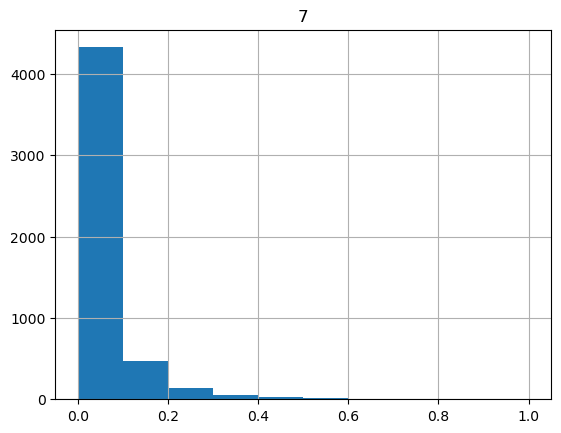

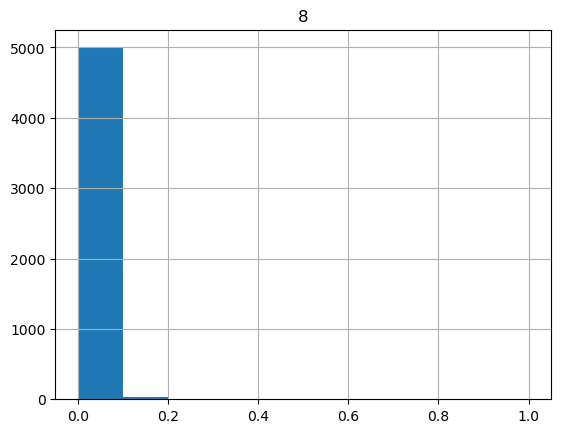

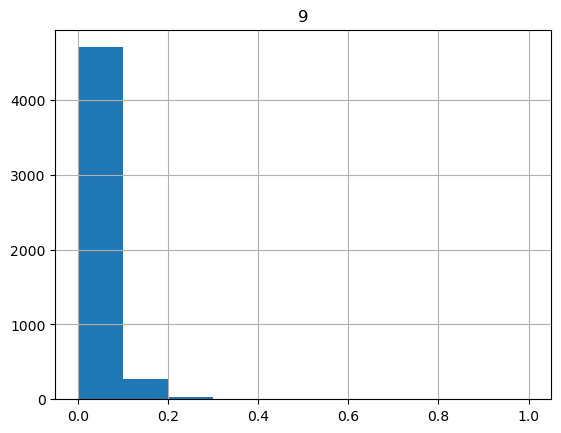

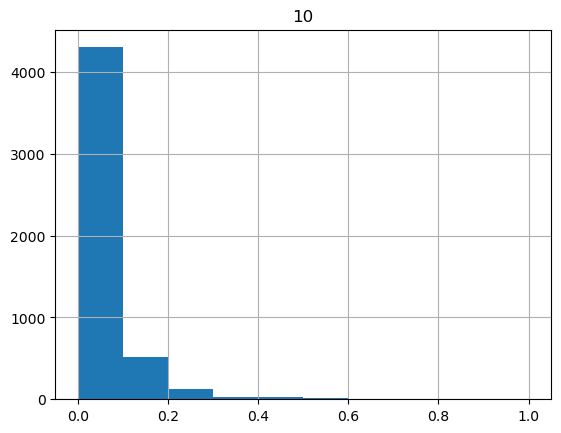

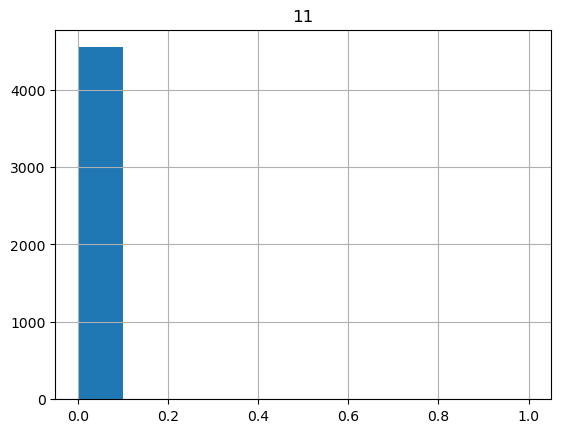

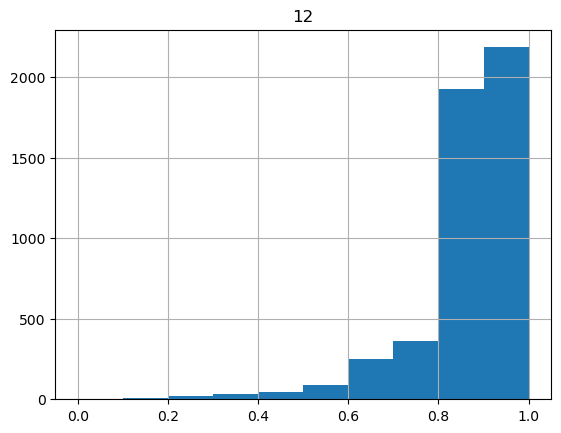

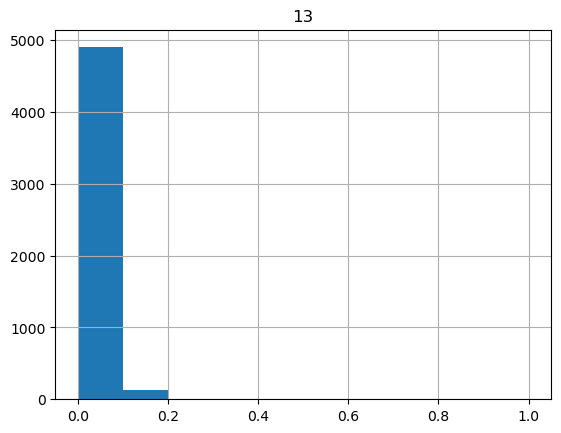

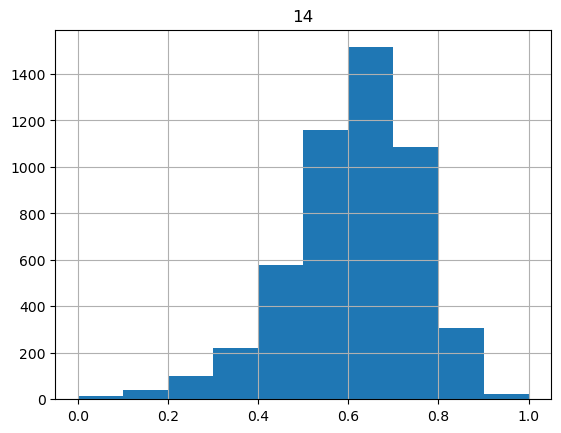

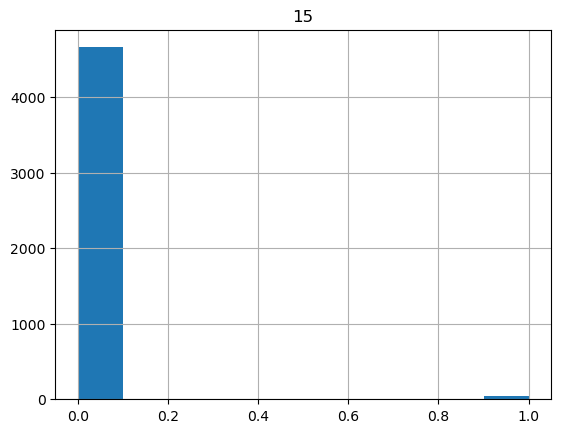

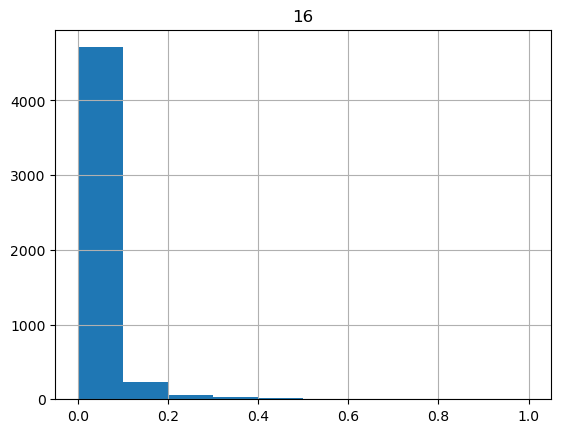

In [6]:
for column in df_num_scaled.columns:
    df_num_scaled[column].hist()
    plt.title(column)
    plt.show()

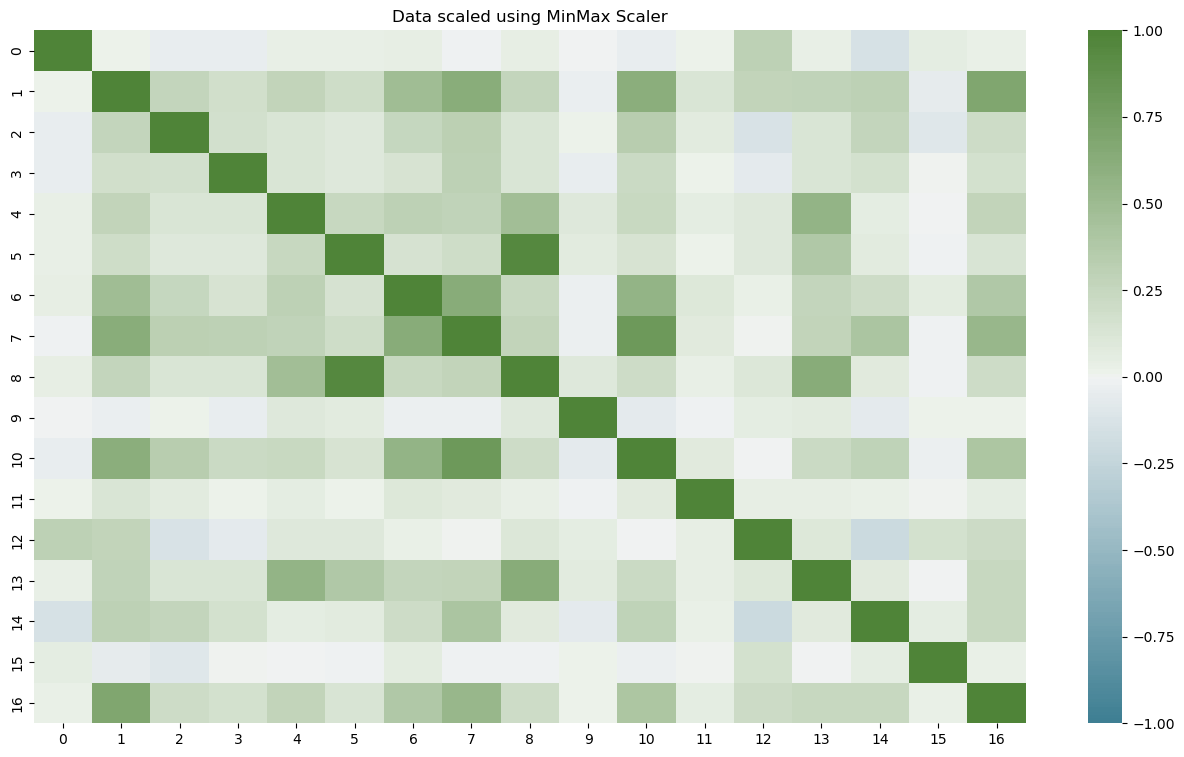

<Figure size 640x480 with 0 Axes>

In [7]:
plt.figure(figsize=(16,9))
plt.title('Data scaled using MinMax Scaler')
sns.heatmap(df_num_scaled.corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 120, n=200))

plt.show()
plt.savefig('correlation_matrix.png')

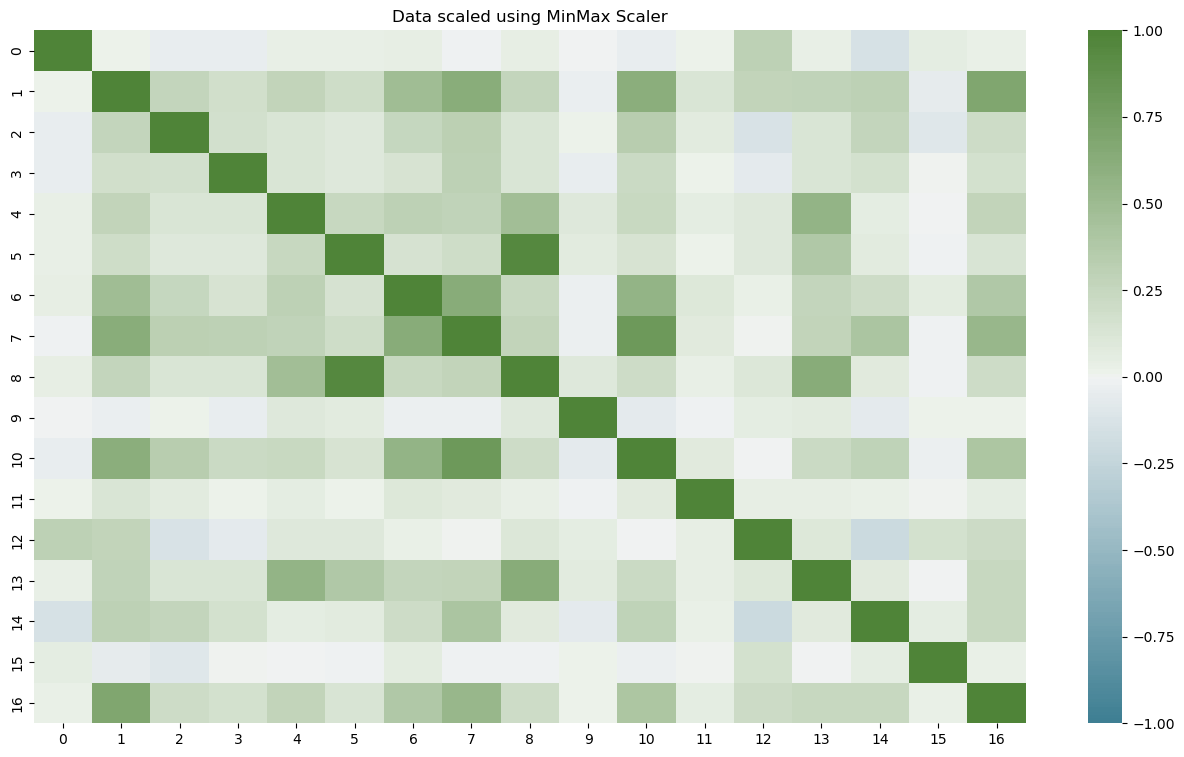

In [8]:
plt.figure(figsize=(16,9))
plt.title('Data scaled using MinMax Scaler')
sns.heatmap(df_num_scaled.corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 120, n=200))

plt.show()

In [9]:
df_nlp = df.filter(['movie_title', 'genres', 'director_name', 'plot_keywords', 'content_rating','language','country'], axis=1)
df_nlp.head()

,movie_title,genres,director_name,plot_keywords,content_rating,language,country
0,Avatar,action adventure fantasy sci-fi,James Cameron,avatar future marine native paraplegic,PG-13,English,USA
1,Pirates of the Caribbean: At World's End,action adventure fantasy,Gore Verbinski,goddess marriage ceremony marriage proposal pi...,PG-13,English,USA
2,Spectre,action adventure thriller,Sam Mendes,bomb espionage sequel spy terrorist,PG-13,English,UK
3,The Dark Knight Rises,action thriller,Christopher Nolan,deception imprisonment lawlessness police offi...,PG-13,English,USA
4,Star Wars: Episode VII - The Force Awakens ...,documentary,Doug Walker,NaN,NaN,Unknown,NaN


In [10]:
seventy_five = np.percentile(df['imdb_score'], 75)

In [11]:
df_nlp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   movie_title     5043 non-null   object
 1   genres          5043 non-null   object
 2   director_name   5043 non-null   object
 3   plot_keywords   4890 non-null   object
 4   content_rating  4740 non-null   object
 5   language        5043 non-null   object
 6   country         5038 non-null   object
dtypes: object(7)
memory usage: 275.9+ KB


In [12]:
seventy_five

7.2

In [13]:
df_nlp['plot_keywords'] = df_nlp['plot_keywords'].fillna('Unknown').str.lower()
df_nlp['content_rating'] = df_nlp['content_rating'].fillna('Unknown')
df_nlp['language'] = df_nlp['language'].fillna('Unknown')
df_nlp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   movie_title     5043 non-null   object
 1   genres          5043 non-null   object
 2   director_name   5043 non-null   object
 3   plot_keywords   5043 non-null   object
 4   content_rating  5043 non-null   object
 5   language        5043 non-null   object
 6   country         5038 non-null   object
dtypes: object(7)
memory usage: 275.9+ KB


In [14]:
df_nlp['soup1'] = df_nlp['movie_title'] + ' ' + df_nlp['genres'] + ' ' + df_nlp['director_name'] 
df_nlp['soup2'] = df_nlp['movie_title'] + ' ' + df_nlp['genres'] + ' ' + df_nlp['director_name'] + ' ' + df_nlp['language']
df_nlp['soup3'] = df_nlp['movie_title'] + ' ' + df_nlp['genres'] + ' ' + df_nlp['director_name'] + ' ' + df_nlp['plot_keywords']
df_nlp['soup4'] = df_nlp['movie_title'] + ' ' + df_nlp['genres'] + ' ' + df_nlp['director_name'] + ' ' + df_nlp['plot_keywords'] + ' ' + df_nlp['content_rating']
df_nlp['soup5'] = df_nlp['movie_title'] + ' ' + df_nlp['genres'] + ' ' + df_nlp['plot_keywords']
df_nlp['soup6'] = df_nlp['movie_title'] + ' ' + df_nlp['genres'] + ' ' + df_nlp['content_rating']
df_nlp.head()

,movie_title,genres,director_name,plot_keywords,content_rating,language,country,soup1,soup2,soup3,soup4,soup5,soup6
0,Avatar,action adventure fantasy sci-fi,James Cameron,avatar future marine native paraplegic,PG-13,English,USA,Avatar action adventure fantasy sci-fi James C...,Avatar action adventure fantasy sci-fi James C...,Avatar action adventure fantasy sci-fi James C...,Avatar action adventure fantasy sci-fi James C...,Avatar action adventure fantasy sci-fi avatar ...,Avatar action adventure fantasy sci-fi PG-13
1,Pirates of the Caribbean: At World's End,action adventure fantasy,Gore Verbinski,goddess marriage ceremony marriage proposal pi...,PG-13,English,USA,Pirates of the Caribbean: At World's End actio...,Pirates of the Caribbean: At World's End actio...,Pirates of the Caribbean: At World's End actio...,Pirates of the Caribbean: At World's End actio...,Pirates of the Caribbean: At World's End actio...,Pirates of the Caribbean: At World's End actio...
2,Spectre,action adventure thriller,Sam Mendes,bomb espionage sequel spy terrorist,PG-13,English,UK,Spectre action adventure thriller Sam Mendes,Spectre action adventure thriller Sam Mendes E...,Spectre action adventure thriller Sam Mendes b...,Spectre action adventure thriller Sam Mendes b...,Spectre action adventure thriller bomb espiona...,Spectre action adventure thriller PG-13
3,The Dark Knight Rises,action thriller,Christopher Nolan,deception imprisonment lawlessness police offi...,PG-13,English,USA,The Dark Knight Rises action thriller Christop...,The Dark Knight Rises action thriller Christop...,The Dark Knight Rises action thriller Christop...,The Dark Knight Rises action thriller Christop...,The Dark Knight Rises action thriller deceptio...,The Dark Knight Rises action thriller PG-13
4,Star Wars: Episode VII - The Force Awakens ...,documentary,Doug Walker,unknown,Unknown,Unknown,NaN,Star Wars: Episode VII - The Force Awakens ...,Star Wars: Episode VII - The Force Awakens ...,Star Wars: Episode VII - The Force Awakens ...,Star Wars: Episode VII - The Force Awakens ...,Star Wars: Episode VII - The Force Awakens ...,Star Wars: Episode VII - The Force Awakens ...


In [15]:
# Initialiser le TfidfVectorizer en enlevant les stop_wordds
tfidf = TfidfVectorizer(stop_words='english')

# constuire the TF-IDF matrix
tfidf_matrix1 = tfidf.fit_transform(df_nlp['soup1'])
tfidf_matrix2 = tfidf.fit_transform(df_nlp['soup2'])
tfidf_matrix3 = tfidf.fit_transform(df_nlp['soup3'])
tfidf_matrix4 = tfidf.fit_transform(df_nlp['soup4'])
tfidf_matrix5 = tfidf.fit_transform(df_nlp['soup5'])
tfidf_matrix6 = tfidf.fit_transform(df_nlp['soup6'])

print('tfidf1 shape: {}'.format(tfidf_matrix1.shape))
print('tfidf2 shape: {}'.format(tfidf_matrix2.shape))
print('tfidf3 shape: {}'.format(tfidf_matrix3.shape))
print('tfidf4 shape: {}'.format(tfidf_matrix4.shape))
print('tfidf5 shape: {}'.format(tfidf_matrix5.shape))
print('tfidf6 shape: {}'.format(tfidf_matrix6.shape))

tfidf1 shape: (5043, 7182)
tfidf2 shape: (5043, 7218)
tfidf3 shape: (5043, 11153)
tfidf4 shape: (5043, 11159)
tfidf5 shape: (5043, 8652)
tfidf6 shape: (5043, 4604)


In [17]:
print(tfidf_matrix6)

  (0, 9)	0.19700905619874093
  (0, 3069)	0.1622550392182538
  (0, 1500)	0.27335456416707815
  (0, 3547)	0.27335456416707815
  (0, 1465)	0.2742159523316881
  (0, 111)	0.23766125212289765
  (0, 95)	0.21801065083084972
  (0, 297)	0.7785944999629325
  (1, 1361)	0.44310451505310455
  (1, 4538)	0.39970857666862847
  (1, 673)	0.5194216252811488
  (1, 3100)	0.4885835615680521
  (1, 9)	0.14664238497142473
  (1, 3069)	0.12077346282291794
  (1, 1465)	0.20411082628894017
  (1, 111)	0.17690157751651378
  (1, 95)	0.16227478271231185
  (2, 4098)	0.22188796723279106
  (2, 3817)	0.8621768263418228
  (2, 9)	0.2181580307106136
  (2, 3069)	0.17967316077601636
  (2, 111)	0.26317425066513944
  (2, 95)	0.24141415210485806
  (3, 3406)	0.6386661071831062
  (3, 2311)	0.5222938841538874
  :	:
  (5038, 4294)	0.23799891707072357
  (5039, 1572)	0.681612897145125
  (5039, 11)	0.4676568896104693
  (5039, 4247)	0.39989774194903965
  (5039, 965)	0.2110347632168956
  (5039, 1234)	0.1284256457475261
  (5039, 2800)	0.2549

In [18]:
# Compute the cosine similarity matrix
cosine_sim1 = linear_kernel(tfidf_matrix1, tfidf_matrix1)
cosine_sim2 = linear_kernel(tfidf_matrix2, tfidf_matrix2)
cosine_sim3 = linear_kernel(tfidf_matrix3, tfidf_matrix3)
cosine_sim4 = linear_kernel(tfidf_matrix4, tfidf_matrix4)
cosine_sim5 = linear_kernel(tfidf_matrix5, tfidf_matrix5)
cosine_sim6 = linear_kernel(tfidf_matrix6, tfidf_matrix6)

cosine_sim1.shape


(5043, 5043)

In [19]:
print(cosine_sim1)

[[1.         0.09168364 0.07171201 ... 0.         0.         0.        ]
 [0.09168364 1.         0.05388071 ... 0.         0.         0.        ]
 [0.07171201 0.05388071 1.         ... 0.02169959 0.         0.        ]
 ...
 [0.         0.         0.02169959 ... 1.         0.0097975  0.        ]
 [0.         0.         0.         ... 0.0097975  1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [20]:
def sparse_corrcoef(A):


    A = A.astype(np.float64)
    n = A.shape[1]

    # Compute the covariance matrix
    rowsum = A.sum(1)
    centering = rowsum.dot(rowsum.T.conjugate()) / n
    C = (A.dot(A.T.conjugate()) - centering) / (n - 1)

    # The correlation coefficients are given by
    # C_{i,j} / sqrt(C_{i} * C_{j})
    d = np.diag(C)
    coeffs = C / np.sqrt(np.outer(d, d))

    return coeffs

In [21]:
sparse_corrcoef(tfidf_matrix1)

matrix([[ 1.00000000e+00,  9.07807683e-02,  7.09999919e-02, ...,
         -8.29188786e-04, -8.21799580e-04, -7.78008261e-04],
        [ 9.07807683e-02,  1.00000000e+00,  5.30794185e-02, ...,
         -9.16424924e-04, -9.08258325e-04, -8.59859869e-04],
        [ 7.09999919e-02,  5.30794185e-02,  1.00000000e+00, ...,
          2.10074975e-02, -7.01183191e-04, -6.63819169e-04],
        ...,
        [-8.29188786e-04, -9.16424924e-04,  2.10074975e-02, ...,
          1.00000000e+00,  9.04764618e-03, -7.16920261e-04],
        [-8.21799580e-04, -9.08258325e-04, -7.01183191e-04, ...,
          9.04764618e-03,  1.00000000e+00, -7.10531521e-04],
        [-7.78008261e-04, -8.59859869e-04, -6.63819169e-04, ...,
         -7.16920261e-04, -7.10531521e-04,  1.00000000e+00]])

In [22]:
indices = pd.Series(df_nlp.index, index=df_nlp['movie_title']).drop_duplicates()

def get_recommendations(title, cosine_sim, indices=indices):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:100]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    #print((df.iloc[movie_indices])['imdb_score'] >= seventy_five)
    #df['newcolumn'] =
    temp = df.iloc[movie_indices]
    temp = temp[df['imdb_score'] >= seventy_five]
    if len(temp) >= 10:
        return (temp[1:10])['movie_title']
    else:
        return temp['movie_title']
    # Return the top 10 most similar movies
import warnings
warnings.filterwarnings('ignore')

In [49]:
get_recommendations('Spectre', cosine_sim3)

3493                      Skyfall
291                     True Lies
457             Road to Perdition
365     Die Hard with a Vengeance
1114           Revolutionary Road
286                 Casino Royale
2944                Casino Royale
2606              American Beauty
32                     Iron Man 3
Name: movie_title, dtype: object

In [48]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

1066                                   Insomnia
97                                    Inception
3716                                    Memento
1233                               The Prestige
120                               Batman Begins
96                                 Interstellar
4017    Batman: The Dark Knight Returns, Part 2
3509                     Dark Angel            
1816                                  Dark City
Name: movie_title, dtype: object

In [38]:
tfidf_matrix2

<5043x7218 sparse matrix of type '<class 'numpy.float64'>'
	with 39890 stored elements in Compressed Sparse Row format>

In [39]:
df_tfidf = pd.DataFrame(tfidf_matrix2)
df_cos = pd.DataFrame(cosine_sim2)
df_cos.head()

,0,1,2,3,4,5,6,7,8,9,...,5033,5034,5035,5036,5037,5038,5039,5040,5041,5042
0,1.000000,0.095778,0.077366,0.031761,0.0,0.171632,0.077937,0.076369,0.129851,0.068627,...,0.096086,0.004766,0.026828,0.005311,0.006011,0.004739,0.007330,0.004721,0.005136,0.005432
1,0.095778,1.000000,0.058205,0.023895,0.0,0.055569,0.058635,0.057455,0.042042,0.051631,...,0.004058,0.003585,0.020184,0.003995,0.004522,0.003565,0.005514,0.003552,0.003864,0.004087
2,0.077366,0.058205,1.000000,0.055042,0.0,0.074782,0.263939,0.035959,0.056578,0.032314,...,0.030131,0.026620,0.050109,0.005377,0.006086,0.004798,0.040943,0.026373,0.005200,0.005500
3,0.031761,0.023895,0.055042,1.000000,0.0,0.030700,0.032394,0.004017,0.023226,0.003610,...,0.024753,0.021869,0.041166,0.004417,0.004999,0.003942,0.033635,0.021666,0.004272,0.004518
4,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088966,0.000000,0.000000,0.065012


In [40]:
df_new = pd.concat([df_num_scaled, df_cos], axis=1)
df_new.shape
df_new = df_new.dropna()
df_new.info()
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_new) for k in range(1, 20)] # I'm running 300
silhouette_scores = [silhouette_score(df_new, kmeans.labels_) for kmeans in kmeans_per_k[1:]]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3801 entries, 0 to 5042
Columns: 5060 entries, 0 to 5042
dtypes: float64(5060)
memory usage: 146.8 MB


E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


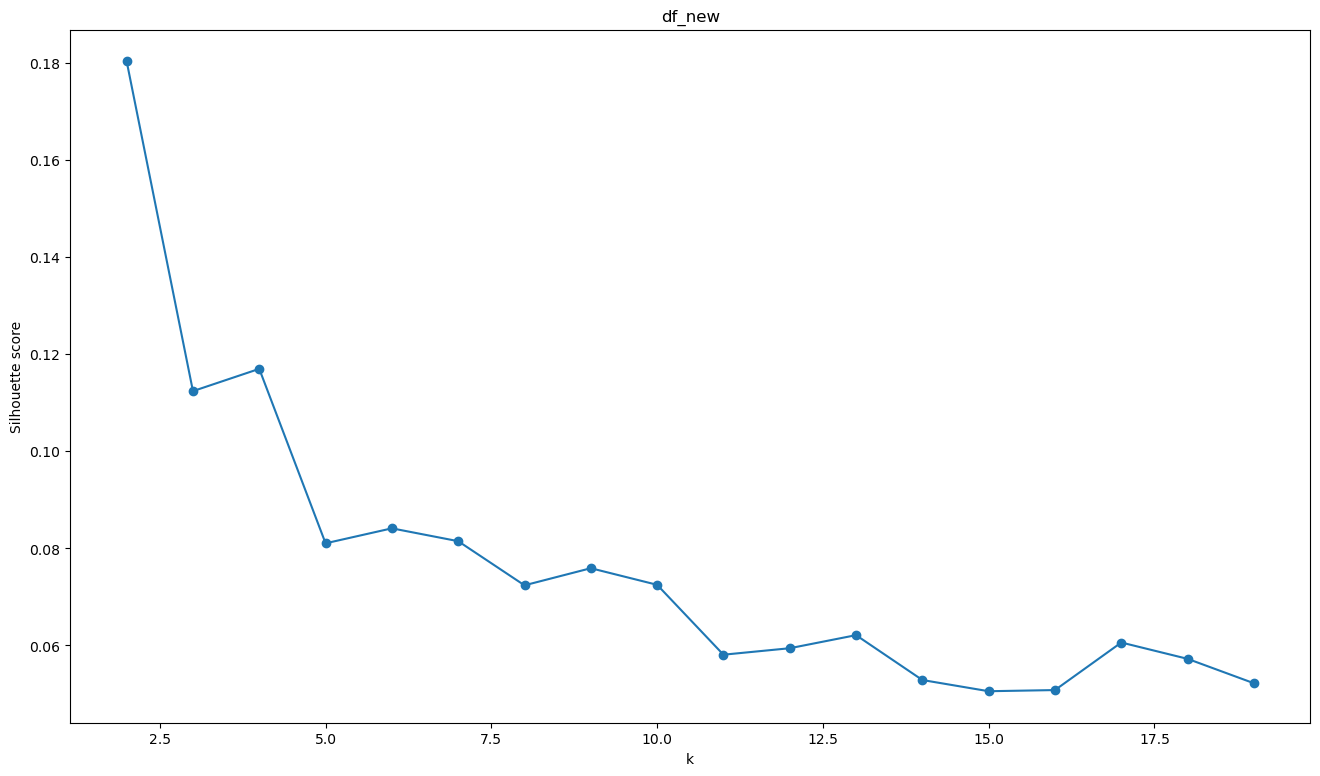

In [26]:
plt.figure(figsize=(16, 9))
plt.plot(range(2, 20), silhouette_scores, 'o-')
plt.title("df_new")
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.show()

In [27]:
model = KMeans(n_clusters=100, init='k-means++', random_state=42)
y_pred = model.fit_predict(df_new)

In [28]:
pd.Series(model.labels_).value_counts()

6     297
93    170
71    149
9     108
65     99
     ... 
49      6
85      6
41      5
91      3
58      3
Length: 100, dtype: int64